In [1]:
### Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV, KFold

In [2]:
## importing data from csv file for modeling
df = pd.read_csv('train.csv')

## Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
col = df.columns

In [5]:
## Calculating high null values columns
high_null_columns = []

for i in col:
    null_val = float(round(df[i].isnull().sum()/len(df.index),2))
    if null_val > 0.10:
        high_null_columns.append(i)

In [6]:
high_null_columns

['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [7]:
## Dropping columns having null values more than 10 percent

for i in high_null_columns:
    df.drop(i, axis=1, inplace=True)

In [8]:
## dropping Id column

df.drop('Id', axis=1, inplace=True)

In [9]:
### Calculating number of years for column having data in year
df['Building_Age'] = df['YearBuilt'].apply(lambda x: df['YearBuilt'].max() - x)
df['YearRemodAdd_Age'] = df['YearRemodAdd'].apply(lambda x: df['YearRemodAdd'].max() - x)
df['YrSold_years'] = df['YrSold'].apply(lambda x: df['YrSold'].max() - x)
df['GarageYrBlt_age'] = df['GarageYrBlt'].apply(lambda x: df['GarageYrBlt'].max() - x)

In [10]:
## dropping columns defined by year
df.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace=True)

## Null values imputing

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1460 non-null   int64  
 1   MSZoning          1460 non-null   object 
 2   LotArea           1460 non-null   int64  
 3   Street            1460 non-null   object 
 4   LotShape          1460 non-null   object 
 5   LandContour       1460 non-null   object 
 6   Utilities         1460 non-null   object 
 7   LotConfig         1460 non-null   object 
 8   LandSlope         1460 non-null   object 
 9   Neighborhood      1460 non-null   object 
 10  Condition1        1460 non-null   object 
 11  Condition2        1460 non-null   object 
 12  BldgType          1460 non-null   object 
 13  HouseStyle        1460 non-null   object 
 14  OverallQual       1460 non-null   int64  
 15  OverallCond       1460 non-null   int64  
 16  RoofStyle         1460 non-null   object 


In [12]:
df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [13]:
df['MasVnrType'].fillna('None', inplace=True)

In [14]:
df['MasVnrArea'].dtype

dtype('float64')

In [15]:
df['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [16]:
df['MasVnrArea'].mean()

103.68526170798899

In [17]:
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace=True)

In [18]:
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [19]:
df['BsmtQual'].fillna('TA', inplace=True)

In [20]:
df['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [21]:
df['BsmtCond'].fillna('TA', inplace=True)

In [22]:
df['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [23]:
df['BsmtExposure'].fillna('No', inplace=True)

In [24]:
df['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [25]:
df['BsmtFinType1'].fillna('Unf', inplace=True)

In [26]:
df['BsmtFinSF1'].dtype

dtype('int64')

In [27]:
df['BsmtFinSF1'].describe()

count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

In [28]:
df['BsmtFinSF1'].mean()

443.6397260273973

In [29]:
df['BsmtFinSF1'].median()

383.5

In [30]:
df['BsmtFinSF1'].fillna(df['BsmtFinSF1'].median(), inplace=True)

In [31]:
df['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [32]:
df['BsmtFinType2'].fillna('Unf', inplace=True)

In [33]:
df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [34]:
df['Electrical'].fillna('SBrkr', inplace=True)

In [35]:
df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [36]:
df['GarageType'].fillna('Attchd', inplace=True)

In [37]:
df['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [38]:
df['GarageFinish'].fillna('Unf', inplace=True)

In [39]:
df['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [40]:
df['GarageQual'].fillna('TA', inplace=True)

In [41]:
df['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [42]:
df['GarageCond'].fillna('TA', inplace=True)

In [43]:
df['GarageYrBlt_age'].isnull().sum()

81

In [44]:
df['GarageYrBlt_age'].fillna(-1, inplace=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1460 non-null   int64  
 1   MSZoning          1460 non-null   object 
 2   LotArea           1460 non-null   int64  
 3   Street            1460 non-null   object 
 4   LotShape          1460 non-null   object 
 5   LandContour       1460 non-null   object 
 6   Utilities         1460 non-null   object 
 7   LotConfig         1460 non-null   object 
 8   LandSlope         1460 non-null   object 
 9   Neighborhood      1460 non-null   object 
 10  Condition1        1460 non-null   object 
 11  Condition2        1460 non-null   object 
 12  BldgType          1460 non-null   object 
 13  HouseStyle        1460 non-null   object 
 14  OverallQual       1460 non-null   int64  
 15  OverallCond       1460 non-null   int64  
 16  RoofStyle         1460 non-null   object 


## Imputing Outliers

In [46]:
percentile_array = [0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,0.99]
df['MSSubClass'].describe(percentile_array)

count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
10%        20.000000
20%        20.000000
30%        20.000000
40%        30.000000
50%        50.000000
60%        60.000000
70%        60.000000
80%        80.000000
90%       120.000000
99%       190.000000
max       190.000000
Name: MSSubClass, dtype: float64

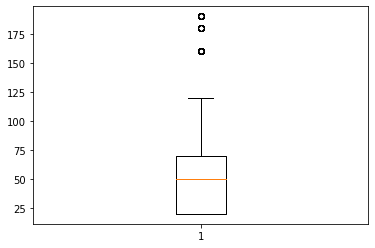

In [47]:
plt.boxplot(df['MSSubClass'])
plt.show()

In [48]:
df['LotArea'].describe(percentile_array)

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
10%        5000.000000
20%        7078.400000
30%        8063.700000
40%        8793.400000
50%        9478.500000
60%       10198.200000
70%       11066.500000
80%       12205.800000
90%       14381.700000
99%       37567.640000
max      215245.000000
Name: LotArea, dtype: float64

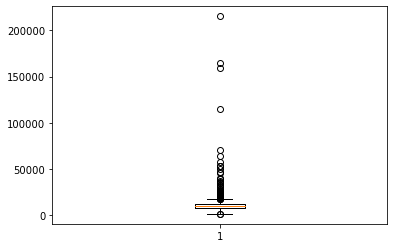

In [49]:
plt.boxplot(df['LotArea'])
plt.show()

In [50]:
df[df['LotArea'] > np.percentile(df['LotArea'], 90)]

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Building_Age,YearRemodAdd_Age,YrSold_years,GarageYrBlt_age
28,20,RL,16321,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Gd,BLQ,1277,Unf,0,207,1484,GasA,TA,Y,SBrkr,1600,0,0,1600,1,0,1,0,2,1,TA,6,Typ,2,Attchd,RFn,1,319,TA,TA,Y,288,258,0,0,0,0,0,12,WD,Normal,207500,53,13,4,53.0
41,20,RL,16905,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,5,6,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,Gd,BLQ,967,Unf,0,383,1350,GasA,Gd,Y,SBrkr,1328,0,0,1328,0,1,1,1,2,1,TA,5,Typ,2,Attchd,RFn,1,308,TA,TA,P,0,104,0,0,0,0,0,7,WD,Normal,170000,51,51,3,51.0
53,20,RL,50271,Pave,IR1,Low,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,9,5,Gable,WdShngl,WdShing,Wd Shng,None,0.0,Gd,TA,CBlock,Ex,TA,Gd,GLQ,1810,Unf,0,32,1842,GasA,Gd,Y,SBrkr,1842,0,0,1842,2,0,0,1,0,1,Gd,5,Typ,1,Attchd,Fin,3,894,TA,TA,Y,857,72,0,0,0,0,0,11,WD,Normal,385000,29,23,4,29.0
66,20,RL,19900,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,PosA,Norm,1Fam,1Story,7,5,Gable,CompShg,Plywood,Plywood,BrkFace,287.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,912,Unf,0,1035,1947,GasA,TA,Y,SBrkr,2207,0,0,2207,1,0,2,0,3,1,TA,7,Min1,1,Attchd,RFn,2,576,TA,TA,Y,301,0,0,0,0,0,0,7,WD,Normal,180000,40,21,0,40.0
69,50,RL,15593,Pave,Reg,Lvl,AllPub,Corner,Gtl,ClearCr,Norm,Norm,1Fam,1.5Fin,7,4,Gable,CompShg,BrkFace,AsbShng,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,603,Unf,0,701,1304,GasW,TA,Y,SBrkr,1304,983,0,2287,0,0,2,0,3,1,TA,7,Typ,1,Attchd,Fin,2,667,TA,TA,Y,0,21,114,0,0,0,0,7,WD,Normal,225000,57,57,4,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,80,RL,19690,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,SLvl,6,7,Flat,Tar&Grv,Plywood,Plywood,None,0.0,Gd,Gd,CBlock,Gd,TA,Av,Unf,0,Unf,0,697,697,GasA,TA,Y,SBrkr,1575,626,0,2201,0,0,2,0,4,1,Gd,8,Typ,1,Attchd,Unf,2,432,Gd,Gd,Y,586,236,0,0,0,738,0,8,WD,Alloca,274970,44,44,4,44.0
1430,60,RL,21930,Pave,IR3,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,5,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,Unf,0,Unf,0,732,732,GasA,Ex,Y,SBrkr,734,1104,0,1838,0,0,2,1,4,1,TA,7,Typ,1,BuiltIn,Fin,2,372,TA,TA,Y,100,40,0,0,0,0,0,7,WD,Normal,192140,5,5,4,5.0
1434,20,RL,17400,Pave,Reg,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,Gable,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,936,Unf,0,190,1126,GasA,Fa,Y,SBrkr,1126,0,0,1126,1,0,2,0,3,1,TA,5,Typ,1,Attchd,RFn,2,484,TA,TA,P,295,41,0,0,0,0,0,5,WD,Normal,160000,33,33,4,33.0
1446,20,RL,26142,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,Gable,CompShg,HdBoard,HdBoard,BrkFace,189.0,TA,TA,CBlock,TA,TA,No,Rec,593,Unf,0,595,1188,GasA,TA,Y,SBrkr,1188,0,0,1188,0,0,1,0,3,1,TA,6,Typ,0,Attchd,Unf,1,312,TA,TA,P,261,39,0,0,0,0,0,4,WD,Normal,157900,48,48,0,48.0


In [51]:
df = df[~(df['LotArea'] > np.percentile(df['LotArea'], 99))]

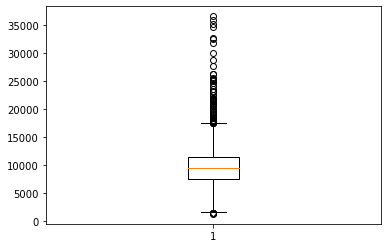

In [52]:
plt.boxplot(df['LotArea'])
plt.show()

In [53]:
df['OverallQual'].describe(percentile_array)

count    1445.000000
mean        6.089965
std         1.376068
min         1.000000
10%         5.000000
20%         5.000000
30%         5.000000
40%         6.000000
50%         6.000000
60%         6.000000
70%         7.000000
80%         7.000000
90%         8.000000
99%        10.000000
max        10.000000
Name: OverallQual, dtype: float64

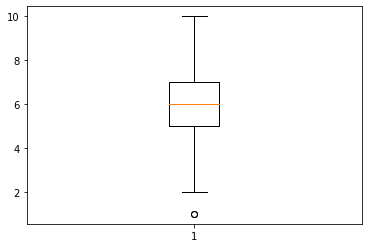

In [54]:
plt.boxplot(df['OverallQual'])
plt.show()

In [55]:
df['OverallCond'].describe(percentile_array)

count    1445.000000
mean        5.573702
std         1.113814
min         1.000000
10%         5.000000
20%         5.000000
30%         5.000000
40%         5.000000
50%         5.000000
60%         5.000000
70%         6.000000
80%         7.000000
90%         7.000000
99%         9.000000
max         9.000000
Name: OverallCond, dtype: float64

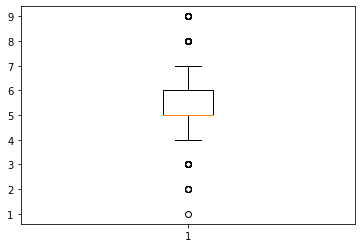

In [56]:
plt.boxplot(df['OverallCond'])
plt.show()

In [57]:
df['MasVnrArea'].describe(percentile_array)


count    1445.000000
mean      102.331129
std       178.351817
min         0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%        25.200000
70%       115.800000
80%       203.200000
90%       322.400000
99%       780.960000
max      1600.000000
Name: MasVnrArea, dtype: float64

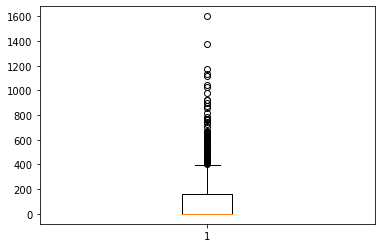

In [58]:
plt.boxplot(df['MasVnrArea'])
plt.show()

In [59]:
df[df['MasVnrArea'] > np.percentile(df['MasVnrArea'], 99)]

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Building_Age,YearRemodAdd_Age,YrSold_years,GarageYrBlt_age
58,60,RL,13682,Pave,IR2,HLS,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,2Story,10,5,Hip,CompShg,VinylSd,VinylSd,BrkFace,1031.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0,Unf,0,1410,1410,GasA,Ex,Y,SBrkr,1426,1519,0,2945,0,0,3,1,3,1,Gd,10,Typ,1,BuiltIn,Fin,3,641,TA,TA,Y,192,0,37,0,0,0,0,10,New,Partial,438780,4,4,4,4.0
70,20,RL,13651,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,6,Gable,CompShg,Plywood,Plywood,BrkFace,1115.0,TA,Gd,CBlock,Gd,TA,Gd,ALQ,1880,Unf,0,343,2223,GasA,Ex,Y,SBrkr,2223,0,0,2223,1,0,2,0,3,1,TA,8,Typ,2,Attchd,Fin,2,516,TA,TA,Y,300,0,0,0,0,0,0,2,WD,Normal,244000,37,37,3,37.0
115,160,FV,3230,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,6,5,Gable,CompShg,MetalSd,MetalSd,BrkFace,1129.0,TA,TA,PConc,Gd,TA,No,GLQ,419,Unf,0,310,729,GasA,Gd,Y,SBrkr,729,729,0,1458,0,0,2,1,2,1,TA,5,Typ,1,Detchd,Unf,2,440,TA,TA,Y,0,32,0,0,0,0,0,6,WD,Normal,176000,11,11,3,11.0
224,20,RL,13472,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,Hip,CompShg,VinylSd,VinylSd,BrkFace,922.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,56,Unf,0,2336,2392,GasA,Ex,Y,SBrkr,2392,0,0,2392,0,0,2,0,3,1,Ex,8,Typ,1,Attchd,Fin,3,968,TA,TA,Y,248,105,0,0,0,0,0,6,WD,Normal,386250,7,7,1,7.0
297,60,FV,7399,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,Hip,CompShg,VinylSd,VinylSd,BrkFace,1600.0,Gd,TA,PConc,Gd,TA,No,BLQ,649,Unf,0,326,975,GasA,Ex,Y,SBrkr,975,975,0,1950,0,0,2,1,3,1,Gd,7,Typ,1,Detchd,RFn,2,576,TA,TA,Y,0,10,0,0,198,0,0,6,WD,Normal,239000,13,12,3,13.0
349,60,RL,20431,Pave,IR2,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,Hip,CompShg,CemntBd,CmentBd,BrkFace,870.0,Ex,TA,PConc,Ex,TA,No,GLQ,1410,Unf,0,438,1848,GasA,Ex,Y,SBrkr,1848,880,0,2728,1,0,2,1,4,1,Ex,10,Typ,2,Attchd,Fin,3,706,TA,TA,Y,0,0,0,0,0,0,0,4,New,Partial,437154,5,4,4,4.0
517,60,RL,10208,Pave,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,921.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1264,1264,GasA,Ex,Y,SBrkr,1277,1067,0,2344,0,0,2,1,3,1,Gd,7,Typ,1,Attchd,RFn,3,889,TA,TA,Y,220,0,0,0,0,0,0,7,WD,Normal,265000,14,13,1,14.0
691,60,RL,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Attchd,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,0,1,WD,Normal,755000,16,15,3,16.0
755,160,FV,3230,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,6,5,Gable,CompShg,MetalSd,MetalSd,BrkFace,894.0,TA,TA,PConc,Gd,TA,No,GLQ,381,Unf,0,348,729,GasA,Gd,Y,SBrkr,742,729,0,1471,0,0,2,1,3,1,TA,6,Typ,0,Detchd,Unf,2,440,TA,TA,Y,0,24,0,0,0,0,0,3,WD,Normal,172500,11,11,1,11.0
798,60,RL,13518,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,Hip,CompShg,VinylSd,VinylSd,Stone,860.0,Ex,TA,PConc,Ex,TA,No,Unf,0,Unf,0,1926,1926,GasA,Ex,Y,SBrkr,1966,1174,0,3140,0,0,3,1,4,1,Ex,11,Typ,2,BuiltIn,Fin,3,820,TA,TA,Y,144,78,0,0,0,0,0,7,New,Partial,485000,2,1,1,1.0


In [60]:
df = df[~(df['MasVnrArea'] > np.percentile(df['MasVnrArea'], 99))]

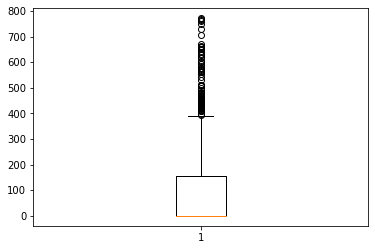

In [61]:
plt.boxplot(df['MasVnrArea'])
plt.show()

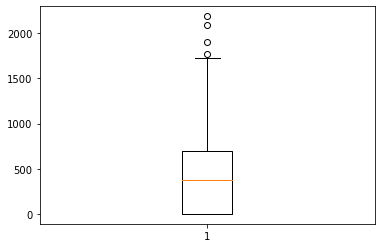

In [62]:
plt.boxplot(df['BsmtFinSF1'])
plt.show()

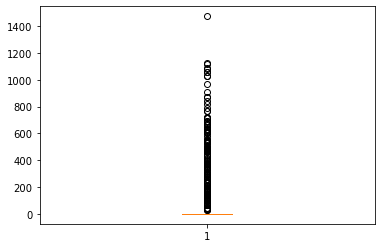

In [63]:
plt.boxplot(df['BsmtFinSF2'])
plt.show()

In [64]:
df['BsmtFinSF2'].describe(percentile_array)

count    1430.000000
mean       45.657343
std       159.089388
min         0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%       108.200000
99%       813.720000
max      1474.000000
Name: BsmtFinSF2, dtype: float64

In [65]:
df['BsmtUnfSF'].describe(percentile_array)

count    1430.000000
mean      566.310490
std       439.386749
min         0.000000
10%        73.800000
20%       172.000000
30%       279.700000
40%       376.800000
50%       481.500000
60%       608.000000
70%       735.300000
80%       896.000000
90%      1228.400000
99%      1776.130000
max      2153.000000
Name: BsmtUnfSF, dtype: float64

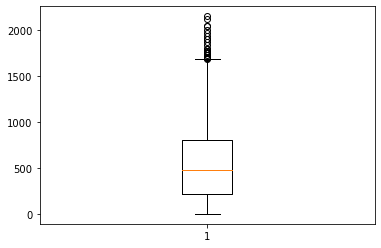

In [66]:
plt.boxplot(df['BsmtUnfSF'])
plt.show()

In [67]:
df['TotalBsmtSF'].describe(percentile_array)

count    1430.000000
mean     1043.327273
std       408.134040
min         0.000000
10%       630.000000
20%       750.000000
30%       832.700000
40%       900.600000
50%       984.500000
60%      1080.000000
70%      1204.300000
80%      1372.200000
90%      1582.200000
99%      2099.720000
max      3206.000000
Name: TotalBsmtSF, dtype: float64

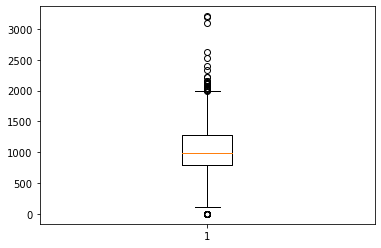

In [68]:
plt.boxplot(df['TotalBsmtSF'])
plt.show()

In [69]:
df['1stFlrSF'].describe(percentile_array)

count    1430.000000
mean     1150.638462
std       365.652900
min       334.000000
10%       756.000000
20%       848.000000
30%       912.000000
40%       994.800000
50%      1080.000000
60%      1168.000000
70%      1302.000000
80%      1468.400000
90%      1659.100000
99%      2150.200000
max      3228.000000
Name: 1stFlrSF, dtype: float64

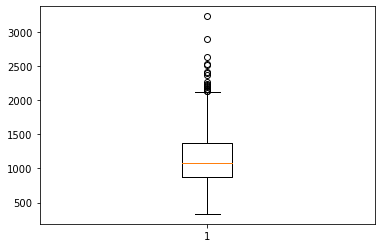

In [70]:
plt.boxplot(df['1stFlrSF'])
plt.show()

In [71]:
df['2ndFlrSF'].describe(percentile_array)

count    1430.000000
mean      339.895804
std       429.001379
min         0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%       442.600000
70%       664.300000
80%       790.000000
90%       932.100000
99%      1359.130000
max      2065.000000
Name: 2ndFlrSF, dtype: float64

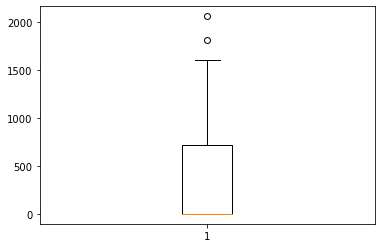

In [72]:
plt.boxplot(df['2ndFlrSF'])
plt.show()

In [73]:
df['LowQualFinSF'].describe(percentile_array)

count    1430.000000
mean        5.967133
std        49.123368
min         0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%         0.000000
99%       360.000000
max       572.000000
Name: LowQualFinSF, dtype: float64

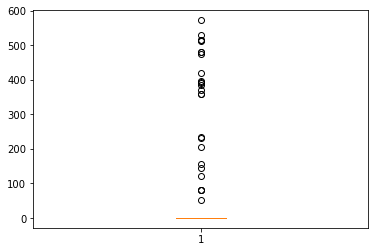

In [74]:
plt.boxplot(df['LowQualFinSF'])
plt.show()

In [75]:
df['GrLivArea'].describe(percentile_array)

count    1430.000000
mean     1496.501399
std       492.721133
min       334.000000
10%       909.700000
20%      1057.000000
30%      1200.000000
40%      1328.000000
50%      1456.000000
60%      1572.000000
70%      1694.600000
80%      1850.000000
90%      2127.000000
99%      2872.000000
max      4476.000000
Name: GrLivArea, dtype: float64

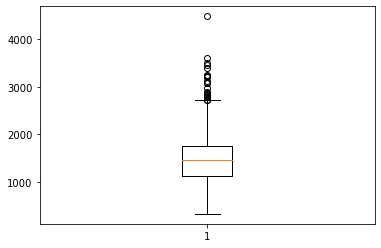

In [76]:
plt.boxplot(df['GrLivArea'])
plt.show()

In [77]:
df['BsmtFullBath'].describe(percentile_array)

count    1430.000000
mean        0.418182
std         0.512904
min         0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         1.000000
70%         1.000000
80%         1.000000
90%         1.000000
99%         1.000000
max         3.000000
Name: BsmtFullBath, dtype: float64

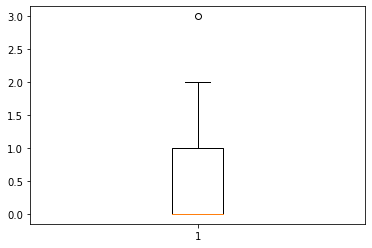

In [78]:
plt.boxplot(df['BsmtFullBath'])
plt.show()

In [79]:
df['FullBath'].describe(percentile_array)

count    1430.000000
mean        1.555245
std         0.542869
min         0.000000
10%         1.000000
20%         1.000000
30%         1.000000
40%         1.000000
50%         2.000000
60%         2.000000
70%         2.000000
80%         2.000000
90%         2.000000
99%         3.000000
max         3.000000
Name: FullBath, dtype: float64

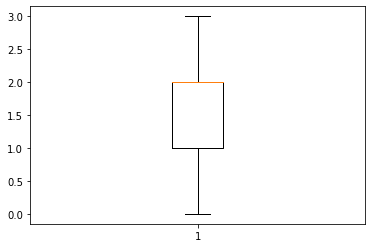

In [80]:
plt.boxplot(df['FullBath'])
plt.show()

In [81]:
df['HalfBath'].describe(percentile_array)

count    1430.000000
mean        0.379021
std         0.502318
min         0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         1.000000
80%         1.000000
90%         1.000000
99%         1.000000
max         2.000000
Name: HalfBath, dtype: float64

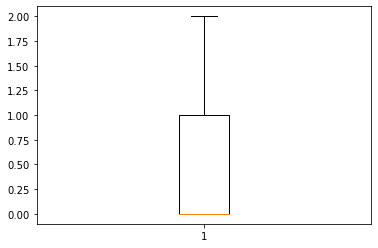

In [82]:
plt.boxplot(df['HalfBath'])
plt.show()

In [83]:
df['BedroomAbvGr'].describe(percentile_array)

count    1430.000000
mean        2.862937
std         0.812402
min         0.000000
10%         2.000000
20%         2.000000
30%         3.000000
40%         3.000000
50%         3.000000
60%         3.000000
70%         3.000000
80%         3.000000
90%         4.000000
99%         5.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64

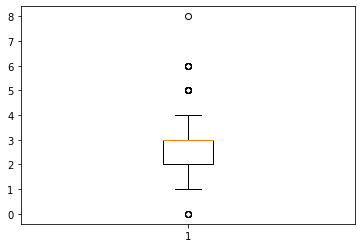

In [84]:
plt.boxplot(df['BedroomAbvGr'])
plt.show()

In [85]:
df['KitchenAbvGr'].describe(percentile_array)

count    1430.000000
mean        1.047552
std         0.222535
min         0.000000
10%         1.000000
20%         1.000000
30%         1.000000
40%         1.000000
50%         1.000000
60%         1.000000
70%         1.000000
80%         1.000000
90%         1.000000
99%         2.000000
max         3.000000
Name: KitchenAbvGr, dtype: float64

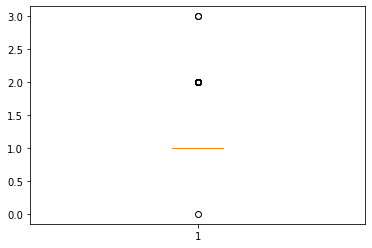

In [86]:
plt.boxplot(df['KitchenAbvGr'])
plt.show()

In [87]:
df['TotRmsAbvGrd'].describe(percentile_array)

count    1430.000000
mean        6.488112
std         1.600231
min         2.000000
10%         5.000000
20%         5.000000
30%         6.000000
40%         6.000000
50%         6.000000
60%         7.000000
70%         7.000000
80%         8.000000
90%         8.000000
99%        11.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64

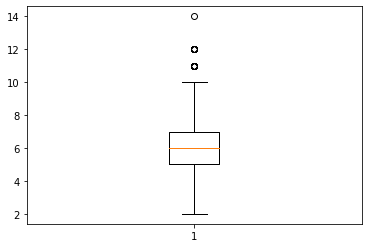

In [88]:
plt.boxplot(df['TotRmsAbvGrd'])
plt.show()

In [89]:
df['Fireplaces'].describe(percentile_array)

count    1430.000000
mean        0.595105
std         0.632990
min         0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         1.000000
60%         1.000000
70%         1.000000
80%         1.000000
90%         1.000000
99%         2.000000
max         3.000000
Name: Fireplaces, dtype: float64

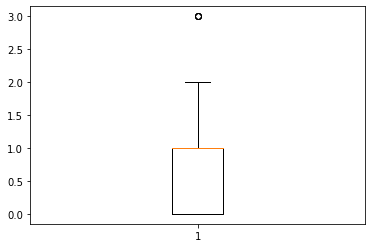

In [90]:
plt.boxplot(df['Fireplaces'])
plt.show()

In [91]:
df['GarageCars'].describe(percentile_array)

count    1430.000000
mean        1.752448
std         0.744641
min         0.000000
10%         1.000000
20%         1.000000
30%         1.000000
40%         2.000000
50%         2.000000
60%         2.000000
70%         2.000000
80%         2.000000
90%         3.000000
99%         3.000000
max         4.000000
Name: GarageCars, dtype: float64

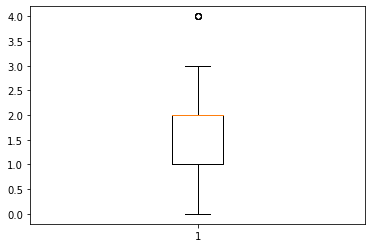

In [92]:
plt.boxplot(df['GarageCars'])
plt.show()

In [93]:
df['GarageArea'].describe(percentile_array)

count    1430.000000
mean      468.453147
std       210.898170
min         0.000000
10%       240.000000
20%       289.600000
30%       380.000000
40%       437.600000
50%       476.000000
60%       511.400000
70%       552.600000
80%       614.000000
90%       749.100000
99%       978.650000
max      1390.000000
Name: GarageArea, dtype: float64

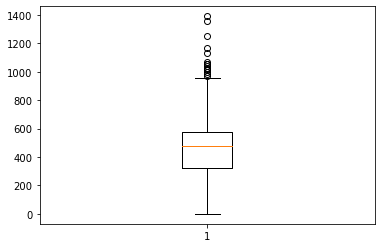

In [94]:
plt.boxplot(df['GarageArea'])
plt.show()

In [95]:
df['WoodDeckSF'].describe(percentile_array)

count    1430.000000
mean       91.313986
std       121.182285
min         0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%       100.000000
70%       144.000000
80%       192.000000
90%       256.000000
99%       483.100000
max       736.000000
Name: WoodDeckSF, dtype: float64

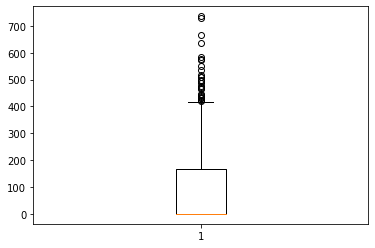

In [96]:
plt.boxplot(df['WoodDeckSF'])
plt.show()

In [97]:
df['OpenPorchSF'].describe(percentile_array)

count    1430.000000
mean       46.251748
std        65.543459
min         0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%        24.000000
60%        40.000000
70%        56.000000
80%        83.200000
90%       130.000000
99%       279.680000
max       547.000000
Name: OpenPorchSF, dtype: float64

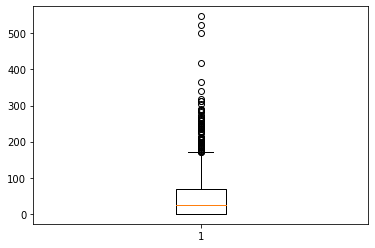

In [98]:
plt.boxplot(df['OpenPorchSF'])
plt.show()

In [99]:
df['EnclosedPorch'].describe(percentile_array)

count    1430.000000
mean       22.353846
std        61.673824
min         0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%       112.000000
99%       262.550000
max       552.000000
Name: EnclosedPorch, dtype: float64

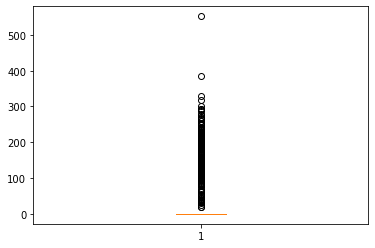

In [100]:
plt.boxplot(df['EnclosedPorch'])
plt.show()

In [101]:
df['3SsnPorch'].describe(percentile_array)

count    1430.000000
mean        3.481119
std        29.619266
min         0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%         0.000000
99%       168.000000
max       508.000000
Name: 3SsnPorch, dtype: float64

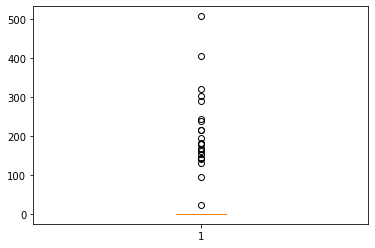

In [102]:
plt.boxplot(df['3SsnPorch'])
plt.show()

In [103]:
df['ScreenPorch'].describe(percentile_array)

count    1430.000000
mean       14.969231
std        55.695140
min         0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%         0.000000
99%       269.550000
max       480.000000
Name: ScreenPorch, dtype: float64

In [104]:
df['PoolArea'].describe(percentile_array)

count    1430.000000
mean        2.481119
std        38.580943
min         0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%         0.000000
99%         0.000000
max       738.000000
Name: PoolArea, dtype: float64

In [105]:
df['MiscVal'].describe(percentile_array)

count     1430.000000
mean        43.562238
std        500.820216
min          0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
99%        700.000000
max      15500.000000
Name: MiscVal, dtype: float64

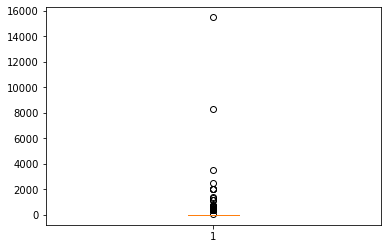

In [106]:
plt.boxplot(df['MiscVal'])
plt.show()

In [107]:
df = df[~(df['MiscVal'] > np.percentile(df['MiscVal'], 99))]

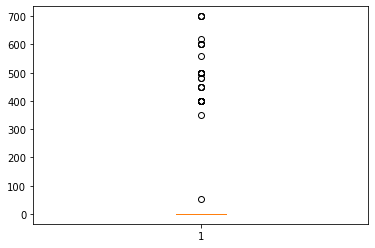

In [108]:
plt.boxplot(df['MiscVal'])
plt.show()

In [109]:
df['MiscVal'].describe(percentile_array)

count    1416.000000
mean       12.319209
std        78.813282
min         0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%         0.000000
99%       500.000000
max       700.000000
Name: MiscVal, dtype: float64

In [110]:
df['MoSold'].describe(percentile_array)

count    1416.000000
mean        6.318503
std         2.712275
min         1.000000
10%         3.000000
20%         4.000000
30%         5.000000
40%         6.000000
50%         6.000000
60%         7.000000
70%         7.000000
80%         8.000000
90%        10.000000
99%        12.000000
max        12.000000
Name: MoSold, dtype: float64

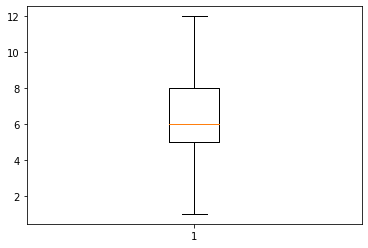

In [111]:
plt.boxplot(df['MoSold'])
plt.show()

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1416 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1416 non-null   int64  
 1   MSZoning          1416 non-null   object 
 2   LotArea           1416 non-null   int64  
 3   Street            1416 non-null   object 
 4   LotShape          1416 non-null   object 
 5   LandContour       1416 non-null   object 
 6   Utilities         1416 non-null   object 
 7   LotConfig         1416 non-null   object 
 8   LandSlope         1416 non-null   object 
 9   Neighborhood      1416 non-null   object 
 10  Condition1        1416 non-null   object 
 11  Condition2        1416 non-null   object 
 12  BldgType          1416 non-null   object 
 13  HouseStyle        1416 non-null   object 
 14  OverallQual       1416 non-null   int64  
 15  OverallCond       1416 non-null   int64  
 16  RoofStyle         1416 non-null   object 


## Data visualization for EDA

In [113]:
## Differntiating numeric columns and categorial for scaling and dummy variable creation respectively

numeric_val_list = ['MSSubClass','LotArea','OverallQual','OverallCond','MasVnrArea','BsmtFinSF1','BsmtFinSF2',
                   'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
                   'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
                   'TotRmsAbvGrd','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF',
                   'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
                   'MiscVal','MoSold','SalePrice','Building_Age','YearRemodAdd_Age','YrSold_years',
                   'GarageYrBlt_age']

categorical_list = ['MSZoning','Street','LotShape','LandContour','LotConfig','LandSlope',
                   'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',
                   'Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual',
                   'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir',
                   'Electrical','KitchenQual','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive',
                    'SaleType','SaleCondition','Functional','Utilities']

In [114]:
## creating dummy variable

for i in categorical_list:
    m1 = pd.get_dummies(df[i], prefix=i, drop_first=True)
    df = pd.concat([df,m1], axis=1)
    dum_col = m1.columns
    for j in dum_col:
        m1.drop(j, axis=1, inplace=True)
    df.drop(i, axis=1, inplace=True)


## Splitting test data and train data

df_train, df_test = train_test_split(df, train_size=0.70, random_state=100)

In [115]:
## Creating StandardScaler scaling object
scalar = StandardScaler()

In [116]:
## Data Scaling
df_train[numeric_val_list] = scalar.fit_transform(df_train[numeric_val_list])
df_test[numeric_val_list] = scalar.transform(df_test[numeric_val_list])

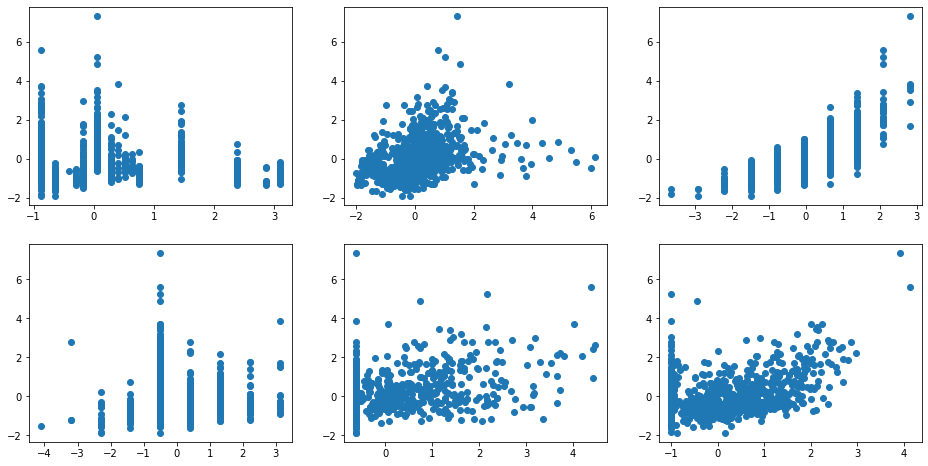

In [117]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(df_train['MSSubClass'], df_train['SalePrice'])
plt.subplot(2,3,2)
plt.scatter(df_train['LotArea'], df_train['SalePrice'])
plt.subplot(2,3,3)
plt.scatter(df_train['OverallQual'], df_train['SalePrice'])
plt.subplot(2,3,4)
plt.scatter(df_train['OverallCond'], df_train['SalePrice'])
plt.subplot(2,3,5)
plt.scatter(df_train['MasVnrArea'], df_train['SalePrice'])
plt.subplot(2,3,6)
plt.scatter(df_train['BsmtFinSF1'], df_train['SalePrice'])
plt.show()

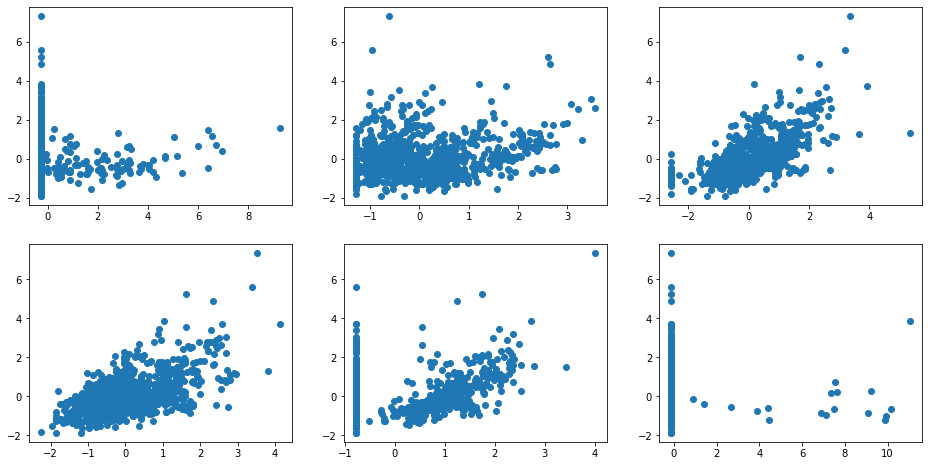

In [118]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(df_train['BsmtFinSF2'], df_train['SalePrice'])
plt.subplot(2,3,2)
plt.scatter(df_train['BsmtUnfSF'], df_train['SalePrice'])
plt.subplot(2,3,3)
plt.scatter(df_train['TotalBsmtSF'], df_train['SalePrice'])
plt.subplot(2,3,4)
plt.scatter(df_train['1stFlrSF'], df_train['SalePrice'])
plt.subplot(2,3,5)
plt.scatter(df_train['2ndFlrSF'], df_train['SalePrice'])
plt.subplot(2,3,6)
plt.scatter(df_train['LowQualFinSF'], df_train['SalePrice'])
plt.show()

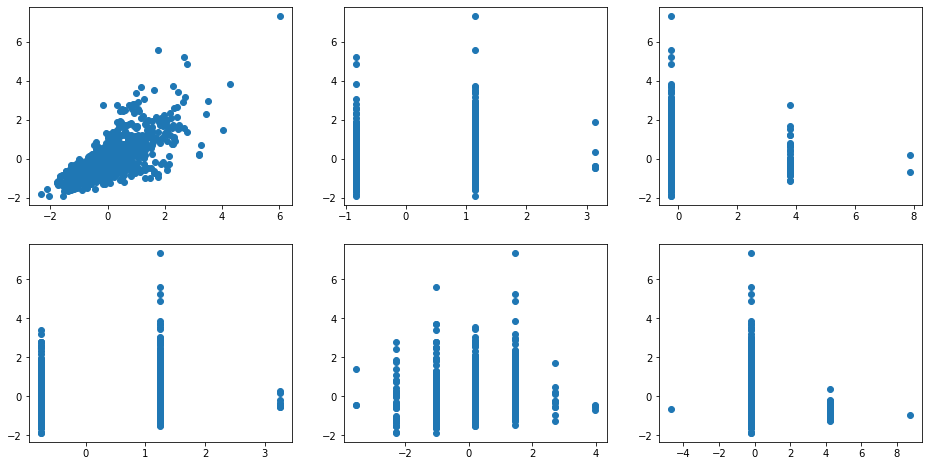

In [119]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.subplot(2,3,2)
plt.scatter(df_train['BsmtFullBath'], df_train['SalePrice'])
plt.subplot(2,3,3)
plt.scatter(df_train['BsmtHalfBath'], df_train['SalePrice'])
plt.subplot(2,3,4)
plt.scatter(df_train['HalfBath'], df_train['SalePrice'])
plt.subplot(2,3,5)
plt.scatter(df_train['BedroomAbvGr'], df_train['SalePrice'])
plt.subplot(2,3,6)
plt.scatter(df_train['KitchenAbvGr'], df_train['SalePrice'])
plt.show()

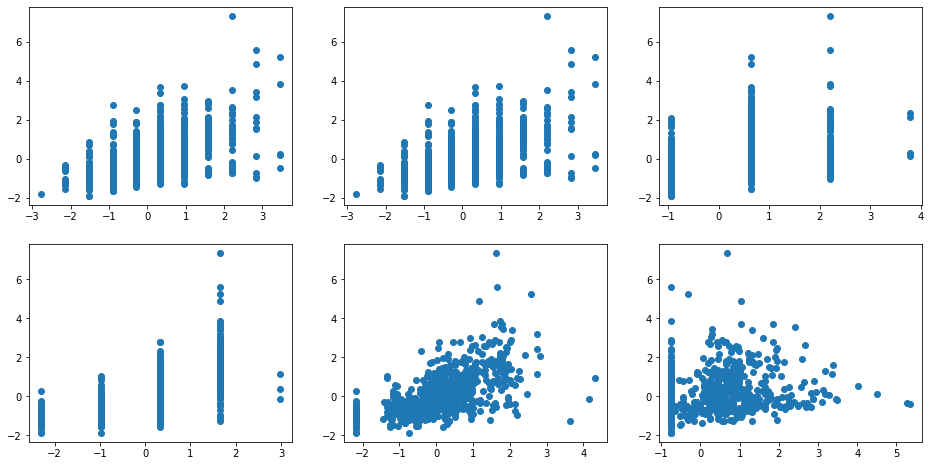

In [120]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(df_train['TotRmsAbvGrd'], df_train['SalePrice'])
plt.subplot(2,3,2)
plt.scatter(df_train['TotRmsAbvGrd'], df_train['SalePrice'])
plt.subplot(2,3,3)
plt.scatter(df_train['Fireplaces'], df_train['SalePrice'])
plt.subplot(2,3,4)
plt.scatter(df_train['GarageCars'], df_train['SalePrice'])
plt.subplot(2,3,5)
plt.scatter(df_train['GarageArea'], df_train['SalePrice'])
plt.subplot(2,3,6)
plt.scatter(df_train['WoodDeckSF'], df_train['SalePrice'])
plt.show()

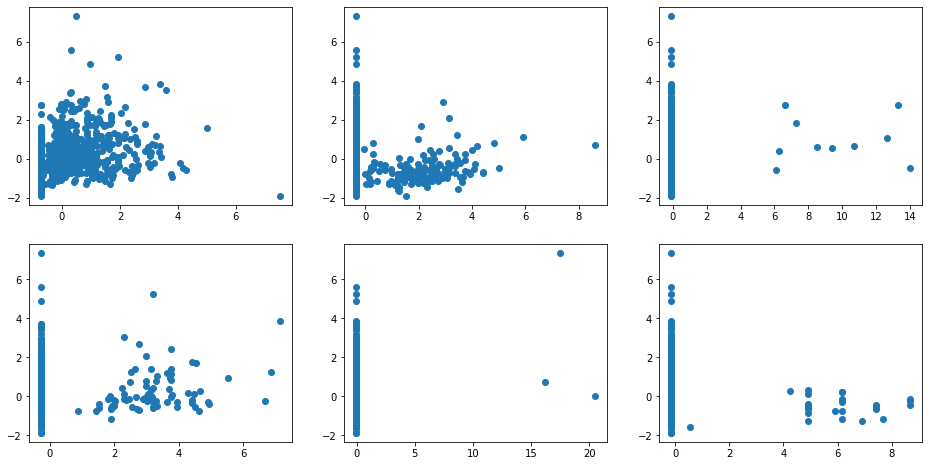

In [121]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(df_train['OpenPorchSF'], df_train['SalePrice'])
plt.subplot(2,3,2)
plt.scatter(df_train['EnclosedPorch'], df_train['SalePrice'])
plt.subplot(2,3,3)
plt.scatter(df_train['3SsnPorch'], df_train['SalePrice'])
plt.subplot(2,3,4)
plt.scatter(df_train['ScreenPorch'], df_train['SalePrice'])
plt.subplot(2,3,5)
plt.scatter(df_train['PoolArea'], df_train['SalePrice'])
plt.subplot(2,3,6)
plt.scatter(df_train['MiscVal'], df_train['SalePrice'])
plt.show()

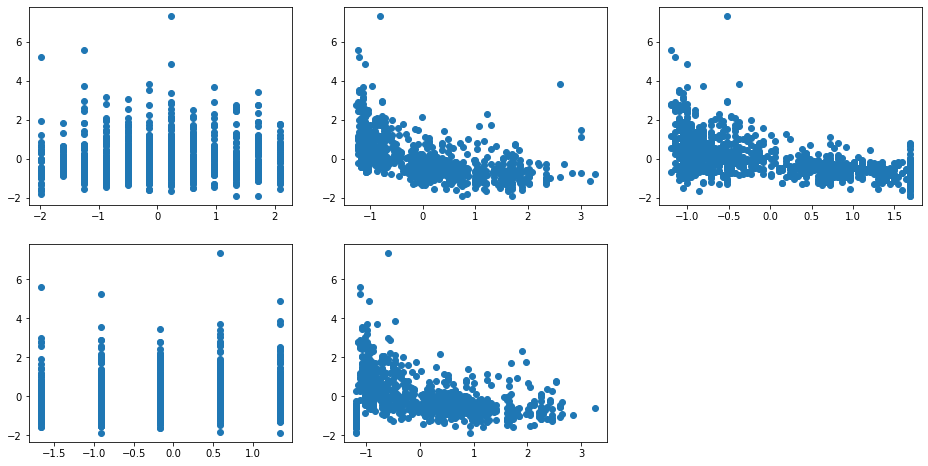

In [122]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(df_train['MoSold'], df_train['SalePrice'])
plt.subplot(2,3,2)
plt.scatter(df_train['Building_Age'], df_train['SalePrice'])
plt.subplot(2,3,3)
plt.scatter(df_train['YearRemodAdd_Age'], df_train['SalePrice'])
plt.subplot(2,3,4)
plt.scatter(df_train['YrSold_years'], df_train['SalePrice'])
plt.subplot(2,3,5)
plt.scatter(df_train['GarageYrBlt_age'], df_train['SalePrice'])
plt.show()

## Model building by Multiple Linear regression

In [123]:
df_train.shape

(991, 228)

In [124]:
df_test.shape

(425, 228)

In [125]:
df_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Building_Age,YearRemodAdd_Age,YrSold_years,GarageYrBlt_age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Utilities_NoSeWa
692,0.052859,3.967023,0.658234,-0.499004,1.308000,1.262527,-0.278828,-0.733248,0.416924,0.248927,2.186542,-0.124412,2.068621,1.152227,-0.245309,0.844560,1.247710,1.453711,-0.216339,1.580816,2.204675,0.332362,0.751847,1.898707,-0.305819,-0.35148,-0.096677,-0.273855,-0.054833,-0.154753,-0.875707,2.026934,-0.572908,-0.235942,1.341224,-0.311510,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0

In [126]:
## Creating Linear Regression object
lr = LinearRegression()

In [127]:
## Spliting dependent variable
y_train = df_train.pop('SalePrice')

In [128]:
## Independent Variable 
X_train = df_train

In [129]:
lr.fit(X_train, y_train)

LinearRegression()

In [130]:
## Using RFE for feature selection as Grid search will take much time due to high column count
rfe = RFE(lr, 70)

In [131]:
rfe = rfe.fit(X_train, y_train)

In [132]:
col = X_train.columns[rfe.support_]

In [133]:
X_train = X_train[col]

In [134]:
lr2 = LinearRegression()

In [135]:
lr2.fit(X_train, y_train)

LinearRegression()

In [136]:
## Predecting dependent varible for train set
y_train_pred = lr2.predict(X_train)

In [137]:
## Imputing r2 score of train set
print('The r2 score of train set by Multiple Linear regression is {}'.format(r2_score(y_true=y_train, y_pred=y_train_pred)))

The r2 score of train set by Multiple Linear regression is 0.9022853253595142


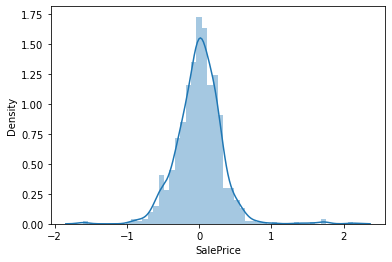

In [138]:
## Residual Analysis

res_train = y_train - y_train_pred
sns.distplot(res_train)
plt.show()

In [139]:
## As the error in model follows normal distribution
## Model Evaluation on test set

In [140]:
df_test.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Building_Age,YearRemodAdd_Age,YrSold_years,GarageYrBlt_age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Utilities_NoSeWa
178,-0.880466,1.867081,2.098212,-0.499004,4.300035,3.464472,-0.278828,-0.582666,2.897934,3.010899,-0.782084,-0.124412,1.494512,1.152227,-0.245309,0.844560,-0.749835,-2.304447,-0.216339,1.580816,0.630588,1.649843,3.262876,-0.749222,0.214670,-0.35148,-0.096677,-0.273855,-0.054833,-0.154753,0.234991,4.192058,-1.196595,-1.148545,-0.917960,-1.112303,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0

In [141]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [142]:
X_test = X_test[col]

In [143]:
y_test_pred = lr2.predict(X_test)

In [144]:
print('The r2 score of test set is {}'.format(r2_score(y_true=y_test, y_pred=y_test_pred)))

The r2 score of test set is -6.218168029297836e+19


## The r2 score of train set is good but the model overfits resulting very low r2 score in test set. To solve overfiiting issue, we will use ridge and Lasso regression

### Ridge Regression

In [145]:
## Creating number of folds
folds = KFold(n_splits=5,shuffle=True,random_state=100)

## Lambda values
hyper_param = [{'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}]

model = Ridge()

model_cv1 = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv1.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                    10.0, 20.0]}],
             return_train_score=True, scoring='r2', verbose=1)

In [146]:
## Creating dataframe of GridSearchCV for Ridge regression model
cv_result1 = pd.DataFrame(model_cv1.cv_results_)
cv_result1['param_alpha'] = cv_result1['param_alpha'].astype('float')
cv_result1.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006573,0.001452,0.003904,0.000297,0.001,{'alpha': 0.001},0.848834,0.898517,0.887912,0.865471,0.851902,0.870527,0.019640,8,0.907863,0.901483,0.903760,0.901500,0.905573,0.904036,0.002451
1,0.009777,0.003201,0.004880,0.001681,0.010,{'alpha': 0.01},0.849213,0.898569,0.887921,0.868123,0.851986,0.871163,0.019446,7,0.907803,0.901425,0.903701,0.901479,0.905572,0.903996,0.002450
2,0.007788,0.001748,0.004174,0.000300,0.100,{'alpha': 0.1},0.851800,0.898656,0.888100,0.880231,0.852758,0.874309,0.018916,6,0.906466,0.900092,0.902333,0.900607,0.905500,0.903000,0.002565
3,0.005807,0.002488,0.003393,0.001691,0.200,{'alpha': 0.2},0.853982,0.898580,0.888321,0.883745,0.853478,0.875621,0.018509,4,0.905494,0.899115,0.901313,0.899610,0.905333,0.902173,0.002745
4,0.004213,0.000072,0.002473,0.000059,0.500,{'alpha': 0.5},0.858094,0.898199,0.888875,0.885276,0.854966,0.877082,0.017331,3,0.903769,0.897445,0.899547,0.897687,0.904630,0.900616,0.003028


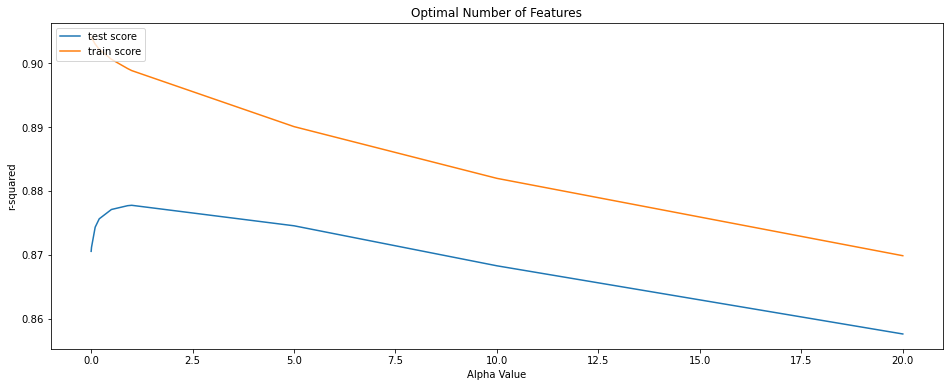

In [147]:
## Plotting graph of mean test score and mean train score 

plt.figure(figsize=(16,6))
plt.plot(cv_result1["param_alpha"], cv_result1["mean_test_score"])
plt.plot(cv_result1["param_alpha"], cv_result1["mean_train_score"])
plt.xlabel('Alpha Value')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')
plt.show()

In [148]:
## Best Lambda value
print(model_cv1.best_params_)

{'alpha': 1.0}


### Lasso Regression

In [149]:
## Creating number of folds
folds = KFold(n_splits=5,shuffle=True,random_state=100)

hyper_param = [{'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 2.0, 10.0,20.0]}]

model = Lasso()

model_cv2 = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv2.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Lasso(),
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 2.0, 10.0,
                                    20.0]}],
             return_train_score=True, scoring='r2', verbose=1)

In [150]:
## Creating dataframe of GridSearchCV for Lasso regression model
cv_result2 = pd.DataFrame(model_cv2.cv_results_)
cv_result2['param_alpha'] = cv_result2['param_alpha'].astype('float')
cv_result2.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.035354,0.005947,0.003597,0.000630,0.001,{'alpha': 0.001},0.858426,0.894397,0.886913,0.877898,0.852108,0.873949,0.016247,1,0.894880,0.889458,0.891510,0.890487,0.897967,0.892860,0.003136
1,0.009681,0.004796,0.003485,0.000819,0.010,{'alpha': 0.01},0.811356,0.833522,0.858661,0.830684,0.796832,0.826211,0.021025,2,0.844554,0.837667,0.827854,0.836075,0.841516,0.837533,0.005674
2,0.004736,0.000609,0.002420,0.000015,0.100,{'alpha': 0.1},0.699250,0.708107,0.726862,0.734199,0.677253,0.709134,0.020286,3,0.724259,0.719855,0.707377,0.709359,0.722641,0.716698,0.006974
3,0.004205,0.000104,0.002428,0.000026,1.000,{'alpha': 1.0},-0.007757,-0.000786,-0.004352,-0.000301,-0.000008,-0.002641,0.002998,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.004124,0.000032,0.002420,0.000005,5.000,{'alpha': 5.0},-0.007757,-0.000786,-0.004352,-0.000301,-0.000008,-0.002641,0.002998,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


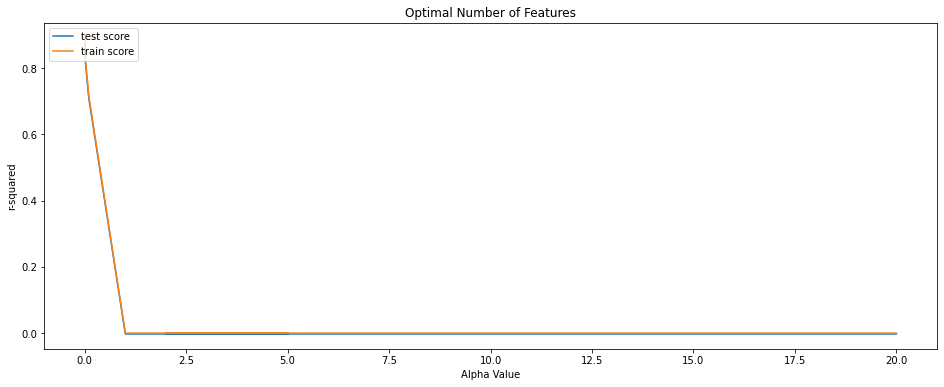

In [151]:
## Plotting graph of mean test score and mean train score 

plt.figure(figsize=(16,6))
plt.plot(cv_result2["param_alpha"], cv_result2["mean_test_score"])
plt.plot(cv_result2["param_alpha"], cv_result2["mean_train_score"])
plt.xlabel('Alpha Value')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')
plt.show()

In [152]:
print('Best alpha value for Ridge Regression is {}'.format(model_cv1.best_params_))
print('Best alpha value for Lasso Regression is {}'.format(model_cv2.best_params_))

Best alpha value for Ridge Regression is {'alpha': 1.0}
Best alpha value for Lasso Regression is {'alpha': 0.001}


## Now building final model 

In [153]:
## Model building by Ridge regression with 1.0 alpha value

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_train_final = ridge.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_pred_train_final))

y_test_pred_final = ridge.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred_final))


0.8975248267557029
0.8600816443786243


In [154]:
## Model Building by Lasso regression with 0.001 alpha value

lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

y_pred_train_final_lasso = lasso.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_pred_train_final_lasso))

y_test_pred_final_lasso = lasso.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred_final_lasso))


0.8910721731586683
0.8692817320757126


## Both mean test score is almost same for Ridge and Lasso regression model. Now let's compute the coefficients of variables

In [155]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

## Coefficient of variable by Lasso regression

In [156]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
0,MSSubClass,0.601501
18,KitchenAbvGr,0.454074
8,TotalBsmtSF,0.424519
16,HalfBath,0.377032
49,LotConfig_Inside,0.374648
17,BedroomAbvGr,0.356071
70,Neighborhood_Sawyer,0.349699
38,MSZoning_RM,0.329035
15,FullBath,0.307927
9,1stFlrSF,0.293143


In [157]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

## Coefficient of variable by Ridge regression

In [158]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
0,MSSubClass,0.798988
18,KitchenAbvGr,0.512556
9,1stFlrSF,0.493688
38,MSZoning_RM,0.430815
66,Neighborhood_NoRidge,0.426450
16,HalfBath,0.404848
49,LotConfig_Inside,0.393663
17,BedroomAbvGr,0.370938
70,Neighborhood_Sawyer,0.352310
11,LowQualFinSF,0.337677


## From the models the strong prediction variables are:
##    1. MSSubClass
##    2. KitchenAbvGr
##    3. 1stFlrSF
##    4. MSZoning_RM

### Subjective questions R&D

In [159]:
## Model building by Ridge regression with 2.0 alpha value

ridge1 = Ridge(alpha=2.0)
ridge1.fit(X_train, y_train)

y_pred_train_final = ridge1.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_pred_train_final))

y_test_pred_final = ridge1.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred_final))

0.8953023019129125
0.863737728514598


In [160]:
## Model Building by Lasso regression with 0.002 alpha value

lasso1 = Lasso(alpha=0.002)
lasso1.fit(X_train, y_train)

y_pred_train_final_lasso = lasso1.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_pred_train_final_lasso))

y_test_pred_final_lasso = lasso1.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred_final_lasso))

0.8852729913727915
0.8695542753700833


In [161]:
## Coefficients after double the alpha value for ridge regression

model_parameter1 = list(ridge.coef_)
model_parameter1.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter1)))
ridge_coef.columns = ['Feaure','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
0,MSSubClass,0.798988
18,KitchenAbvGr,0.512556
9,1stFlrSF,0.493688
38,MSZoning_RM,0.430815
66,Neighborhood_NoRidge,0.426450
16,HalfBath,0.404848
49,LotConfig_Inside,0.393663
17,BedroomAbvGr,0.370938
70,Neighborhood_Sawyer,0.352310
11,LowQualFinSF,0.337677


In [162]:
## Coefficients after double the alpha value for lasso regression

model_param1 = list(lasso.coef_)
model_param1.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param1)))
lasso_coef.columns = ['Featuere','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
0,MSSubClass,0.601501
18,KitchenAbvGr,0.454074
8,TotalBsmtSF,0.424519
16,HalfBath,0.377032
49,LotConfig_Inside,0.374648
17,BedroomAbvGr,0.356071
70,Neighborhood_Sawyer,0.349699
38,MSZoning_RM,0.329035
15,FullBath,0.307927
9,1stFlrSF,0.293143


In [163]:
df_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Building_Age,YearRemodAdd_Age,YrSold_years,GarageYrBlt_age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Utilities_NoSeWa
692,0.052859,3.967023,0.658234,-0.499004,1.308000,1.262527,-0.278828,-0.733248,0.416924,0.248927,2.186542,-0.124412,2.068621,1.152227,-0.245309,0.844560,1.247710,1.453711,-0.216339,1.580816,2.204675,0.332362,0.751847,1.898707,-0.305819,-0.35148,-0.096677,-0.273855,-0.054833,-0.154753,-0.875707,-0.572908,-0.235942,1.341224,-0.311510,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [164]:
df_train.drop(['MSSubClass','KitchenAbvGr','1stFlrSF','MSZoning_RM','TotalBsmtSF'], axis=1, inplace=True)
df_test.drop(['MSSubClass','KitchenAbvGr','1stFlrSF','MSZoning_RM','TotalBsmtSF'], axis=1, inplace=True)

In [165]:
ridge2 = Ridge(alpha=1.0)
ridge2.fit(X_train, y_train)

y_pred_train_final = ridge2.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_pred_train_final))

y_test_pred_final = ridge2.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred_final))


0.8975248267557029
0.8600816443786243


In [166]:
lasso2 = Lasso(alpha=0.001)
lasso2.fit(X_train, y_train)

y_pred_train_final_lasso = lasso2.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_pred_train_final_lasso))

y_test_pred_final_lasso = lasso2.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred_final_lasso))


0.8910721731586683
0.8692817320757126


In [167]:
model_parameter3 = list(ridge.coef_)
model_parameter3.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter3)))
ridge_coef.columns = ['Feaure','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
0,LotArea,0.798988
18,GarageArea,0.512556
9,GrLivArea,0.493688
38,LandContour_HLS,0.430815
66,Neighborhood_SawyerW,0.426450
16,Fireplaces,0.404848
49,Neighborhood_BrkSide,0.393663
17,GarageCars,0.370938
70,Neighborhood_Veenker,0.352310
11,BsmtHalfBath,0.337677


In [168]:
model_param1 = list(lasso.coef_)
model_param1.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param1)))
lasso_coef.columns = ['Featuere','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
0,LotArea,0.601501
18,GarageArea,0.454074
8,LowQualFinSF,0.424519
16,Fireplaces,0.377032
49,Neighborhood_BrkSide,0.374648
17,GarageCars,0.356071
70,Neighborhood_Veenker,0.349699
38,LandContour_HLS,0.329035
15,TotRmsAbvGrd,0.307927
9,GrLivArea,0.293143
